### Regressão Linear

O objetivo da tarefa de regressão é estimar um valor a partir do relacionamento de duas ou mais variáveis. Por exemplo, qual a relação de características como área, quantidade de quartos e localização com o valor de um imóvel?

![Python](img/regressao/relacao.jpg)

Essa relação é representada por uma equação matemática, onde a previsão é realizada calculando a soma ponderada das características de entrada, mais uma constante chamada __coeficiente linear__.

$$
\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \cdots + \theta_{n}x_{n}
$$

* $\hat{y}$ é o valor previsto;
* n é o número de características;
* $x_{i}$ é o valor da i-ésima característica;
* $\theta_{0}$ é o coeficiente linear, valor onde a reta corta o eixo das ordenadas (y);
* $\theta_{i}$ é o peso da i-ésima característica.

A equação anterior pode ser escrita na forma vetorizada:

$$\hat{y} = h_{0}(x) = \theta^T.x$$ 

* $\theta$ é o vetor de parâmetro do modelo ($\theta_{0}, \theta_{1}, \cdots, \theta_{n}$);
* $\theta^T$ é a transposição de $\theta$;
* $x$ é o vetor de características ($x_{0}, x_{1}, \cdots, x_{n}$);
* $h_{\theta}$ é a função de hipótese.

Ao treinar um modelo de regressão linear, estamos interessados em obter o valor de $\theta$ que minimize a função de custo. Uma função de custo tipicamente utilizada em problemas de regressão é o **MSE (Erro Quadrático Médio)**:  

$$\mathrm{MSE} (X,h_{\theta}) = \dfrac{1}{m} \sum_{i = 1}^{m} (\theta^T . x^{(i)} - y^{i})^2$$  

* $m$ é o número de instâncias no conjunto de dados.
* $\theta^T$ é a transposição do vetor de parâmetro do modelo;
* $x^{(i)}$ é o vetor contendo os valores das características e $y^i$ seus respectivos rótulos.
* $X$ é uma matriz das características.
* $h_{\theta}$ é a função de hipótese.

O **Erro Quadrático Médio** nos informa a que distância a reta de regressão está do conjunto de dados. Calculando o erro (distância entre os pontos e a reta) e elevando ao quadrado (para remover sinais negativos), dando maior peso para grandes erros. A reta com o melhor ajuste possível é a que fornece o menor erro quadrático médio.

![MSE](img/regressao/mse.jpg)

Para entrontrar o valor de $\theta$ que minimize a função MSE, existe o **Método dos Mínimos Quadrados**:  


$$\hat{\theta} = (X^T.X)^{-1}.X^T.y$$  

* $\hat{\theta}$ é o valor de $\theta$ que minimiza a função custo.
* $y$ é o vetor dos valores do alvo.


Vamos gerar um conjunto de dados lineares e calcular $\hat{\theta}$ usando o Método dos Mínimos Quadrados.

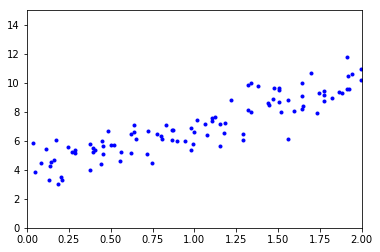

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

y = 4 + 3x, equação reta reduzida, theta0 e theta1

Nosso objetivo é encontrar a reta que melhor se ajusta ao nosso conjunto de treinamento. Esta reta é definida pela equação:  

$$y = \theta_{0} + \theta_{1} + \varepsilon $$  

* $\theta_{0}$ é o coeficiente linear.
* $\theta_{1}$ é o coeficiente angular.
* $\varepsilon$ é o ruído gaussiano.
    
Vamos obter $\theta_{0}$ e $\theta_{1}$ através do **Método dos Mínimos Quadrados**:

In [15]:
X_b = np.c_[np.ones((100, 1)), X]
theta_param = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #Método Mínimo Quadrado
theta_param

array([[3.92621827],
       [3.07656241]])

Obtemos $\theta_{0}$ = 3.926 e $\theta_{1}$ = 3.076. A equação utilizada para gerar os dados foi $y = 4 + 3x$, a diferença entre o valor utilizado e o obtido é causado pelo ruído gaussiano.

Agora que temos $\hat{\theta}$, podemos fazer previsões:

In [20]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_param)
y_predict


array([[ 3.92621827],
       [10.07934308]])

Vamos plotar as previsões do modelo:

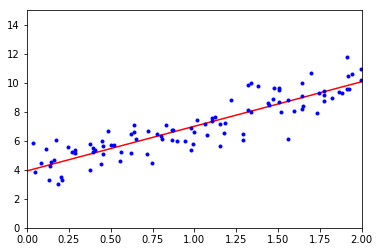

In [32]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Aplicando o modelo de regressão linear simples utilizando a biblioteca Scikit-Learn:

In [25]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
linear_reg.intercept_ #coeficiente linear

array([3.92621827])

In [28]:
linear_reg.coef_ #coeficiente angular

array([[3.07656241]])

In [30]:
linear_reg.predict(X_new)

array([[ 3.92621827],
       [10.07934308]])

A complexidade computacional ao treinar um modelo de Regressão Linear utilizando o Método dos Mínimos Quadrados é linear em relação ao número de instâncias e características. Dessa forma, ao dobrar a quantidade de instâncias que desejamos prever, iremos dobrar o tempo necessário para realizar a previsão.

Ficou com dúvida em relação à algum conceito de álgebra linear?  
**[Acesse o material abaixo sobre Álgebra Linear com Python!](https://github.com/BrunoDorneles/data_science/blob/master/%C3%81lgebra%20Linear%20com%20Python%20e%20Numpy.ipynb)**

### Referências
**[Mãos à Obra: Aprendizado de Máquina com Scikit-Learn & TensorFlow](https://www.amazon.com.br/M%C3%A3os-Obra-Aprendizado-Scikit-Learn-TensorFlow/dp/8550803812)**  
**[Sigmoidal](https://sigmoidal.ai/como-implementar-regressao-linear-com-python/)**  
**[Statistics How To: Mean Squared Error](https://www.statisticshowto.datasciencecentral.com/mean-squared-error/)**  
**[Towards Data Science: Why Mean Square Error?](https://towardsdatascience.com/https-medium-com-chayankathuria-regression-why-mean-square-error-a8cad2a1c96f)**



